In [1]:
import os
import sys

import pandas as pd
import numpy as np
from sklearn.svm import SVC

from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.utils import within_subject_functional_normalization
from src.utils import evaluate_scores
from src.utils import get_splits

In [4]:
from src.config import AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES, var_name_to_feat
from src.plots.misc import plot_hist

In [5]:
df = pd.read_csv("../data/master_functionals_new_features.csv")
df

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,33.207450,0.188117,33.557415,35.970253,37.030464,3.473049,233.493740,237.09804,...,0,20.0,1.0,2,1.78,0.296667,1.0,1.0,0.0,0.0
1,1,0,31.973427,0.172323,24.031258,33.894035,36.294712,12.263454,36.486237,7.24742,...,1,80.0,1.0,2,1.58,0.395000,1.0,1.0,0.0,0.0
2,2,0,23.677464,0.129553,22.237234,23.013530,25.102104,2.864870,145.572220,159.39350,...,1,60.0,1.0,2,7.48,0.325217,5.0,1.0,0.0,0.0
3,3,0,33.611103,0.090990,33.551422,34.227577,34.913113,1.361690,123.937220,74.90742,...,1,100.0,2.0,2,0.09,0.090000,0.0,0.0,0.0,0.0
4,4,0,31.766670,0.110006,31.128075,31.511560,33.566906,2.438831,31.893764,36.00795,...,1,80.0,1.0,2,1.29,0.215000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,3332,0,20.228983,0.246194,14.451830,20.386751,26.042356,11.590527,245.911530,198.15411,...,1,80.0,1.0,2,2.67,0.381429,3.0,1.0,0.0,0.0
3333,3333,0,31.126240,0.114296,31.571873,32.327450,32.699960,1.128086,324.486900,250.81499,...,1,80.0,2.0,2,1.00,0.166667,0.0,0.0,0.0,0.0
3334,3334,0,29.766552,0.129714,29.915512,30.895258,31.772797,1.857285,259.278050,369.85800,...,1,100.0,1.0,1,1.92,0.174545,0.0,0.0,0.0,0.0
3335,3335,0,33.463300,0.230548,24.733616,36.905180,38.047897,13.314281,255.713210,0.00000,...,1,100.0,1.0,1,0.00,0.000000,0.0,0.0,0.0,0.0


In [6]:
participant_ids = df["participant"].values
participant_ids

array([36, 21, 34, ..., 29, 37, 23])

In [7]:
df[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(
                                                df[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES],
                                                participant_ids,
                                                "standard")
df

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,0.259983,0.332261,0.866330,0.506420,0.320359,-0.790661,0.054842,0.289241,...,0,20.0,1.0,2,0.064130,-0.079352,0.217061,0.942293,-0.490511,-0.429669
1,1,0,-0.717108,0.725696,-1.882271,-0.319202,-0.012434,1.862051,-0.836629,-0.675393,...,1,80.0,1.0,2,-0.091515,0.026350,0.220541,0.992432,-0.538028,-0.408248
2,2,0,-0.566677,-0.205434,-0.120069,-0.761264,-0.667896,-0.572266,0.024613,0.186602,...,1,60.0,1.0,2,5.475477,1.376780,6.037742,2.412091,-0.237356,0.000000
3,3,0,0.919177,-0.523623,1.150908,1.216159,0.367601,-0.741268,-0.271717,-0.377001,...,1,100.0,2.0,2,-0.756171,-0.630867,-0.715078,-0.456357,-0.313993,-0.232495
4,4,0,0.388853,-0.532196,0.628008,-0.127185,-0.194455,-0.701555,-0.916483,-0.569107,...,1,80.0,1.0,2,-0.393502,-0.349288,-0.095453,-0.621455,-0.502331,-0.443203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,3332,0,-0.450267,1.362586,-1.129102,-0.455241,0.339407,1.720947,0.798251,0.744770,...,1,80.0,1.0,2,0.455788,0.122313,1.659524,0.928705,-0.500835,-0.429669
3333,3333,0,-0.211937,-0.124017,0.559091,0.318900,-0.378290,-0.804033,0.598907,0.307612,...,1,80.0,2.0,2,-0.221153,-0.200000,-0.715078,-0.456357,-0.313993,-0.232495
3334,3334,0,0.043278,-0.212633,0.459059,0.032353,-0.061197,-0.793500,0.414662,1.239616,...,1,100.0,1.0,1,0.528203,-0.246869,-0.653204,-0.551487,-0.313050,0.000000
3335,3335,0,-1.120744,1.811996,-2.040631,0.103935,0.535386,2.230362,0.452582,-0.727131,...,1,100.0,1.0,1,-0.614963,-0.673075,-0.428496,-0.256495,-0.111803,0.000000


In [8]:
y = df["accuracy"].values
x = df[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES].values

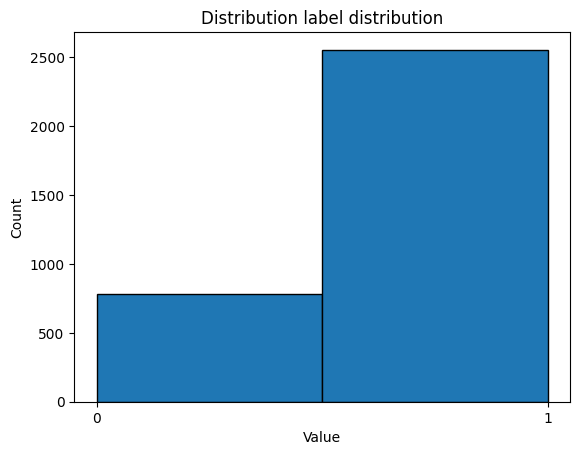

In [9]:
plot_hist(y, "label distribution")

In [10]:
optimal_hyper_parameters = {'C': 10, 'class_weight': 'balanced', 'gamma': 0.0001, 'kernel': 'rbf'}
svc = SVC(**optimal_hyper_parameters)

In [11]:
evaluate_scores(x, y, svc, "roc_auc")


printing roc_auc measures
avg (train): 0.6767633154311223
std (train): 0.0048792687110537514
avg (validation): 0.6382719162581303
std (validation): 0.015938227382897005


# Permutation Importance

We will begin by investigating permutation importance on all features, without eliminating any collinear features.

In [12]:
splits = get_splits(x, y)

importances = None

for train_index, val_index in splits:
    X_train, y_train = x[train_index], y[train_index]
    X_val, y_val = x[val_index], y[val_index]

    svc.fit(X_train, y_train)

    result = permutation_importance(svc, X_val, y_val, n_repeats=20, n_jobs=-1, scoring="roc_auc")

    if not type(importances) == np.ndarray:
        importances = result['importances']
    else:
        importances = np.hstack([importances, result['importances']])

In [13]:
d = {"importances": importances,
     "importances_mean": np.mean(importances, axis=1),
     "importances_std": np.std(importances, axis=1)}

perm_sorted_idx = d['importances_mean'].argsort()

In [14]:
AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES = np.asarray(AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES)

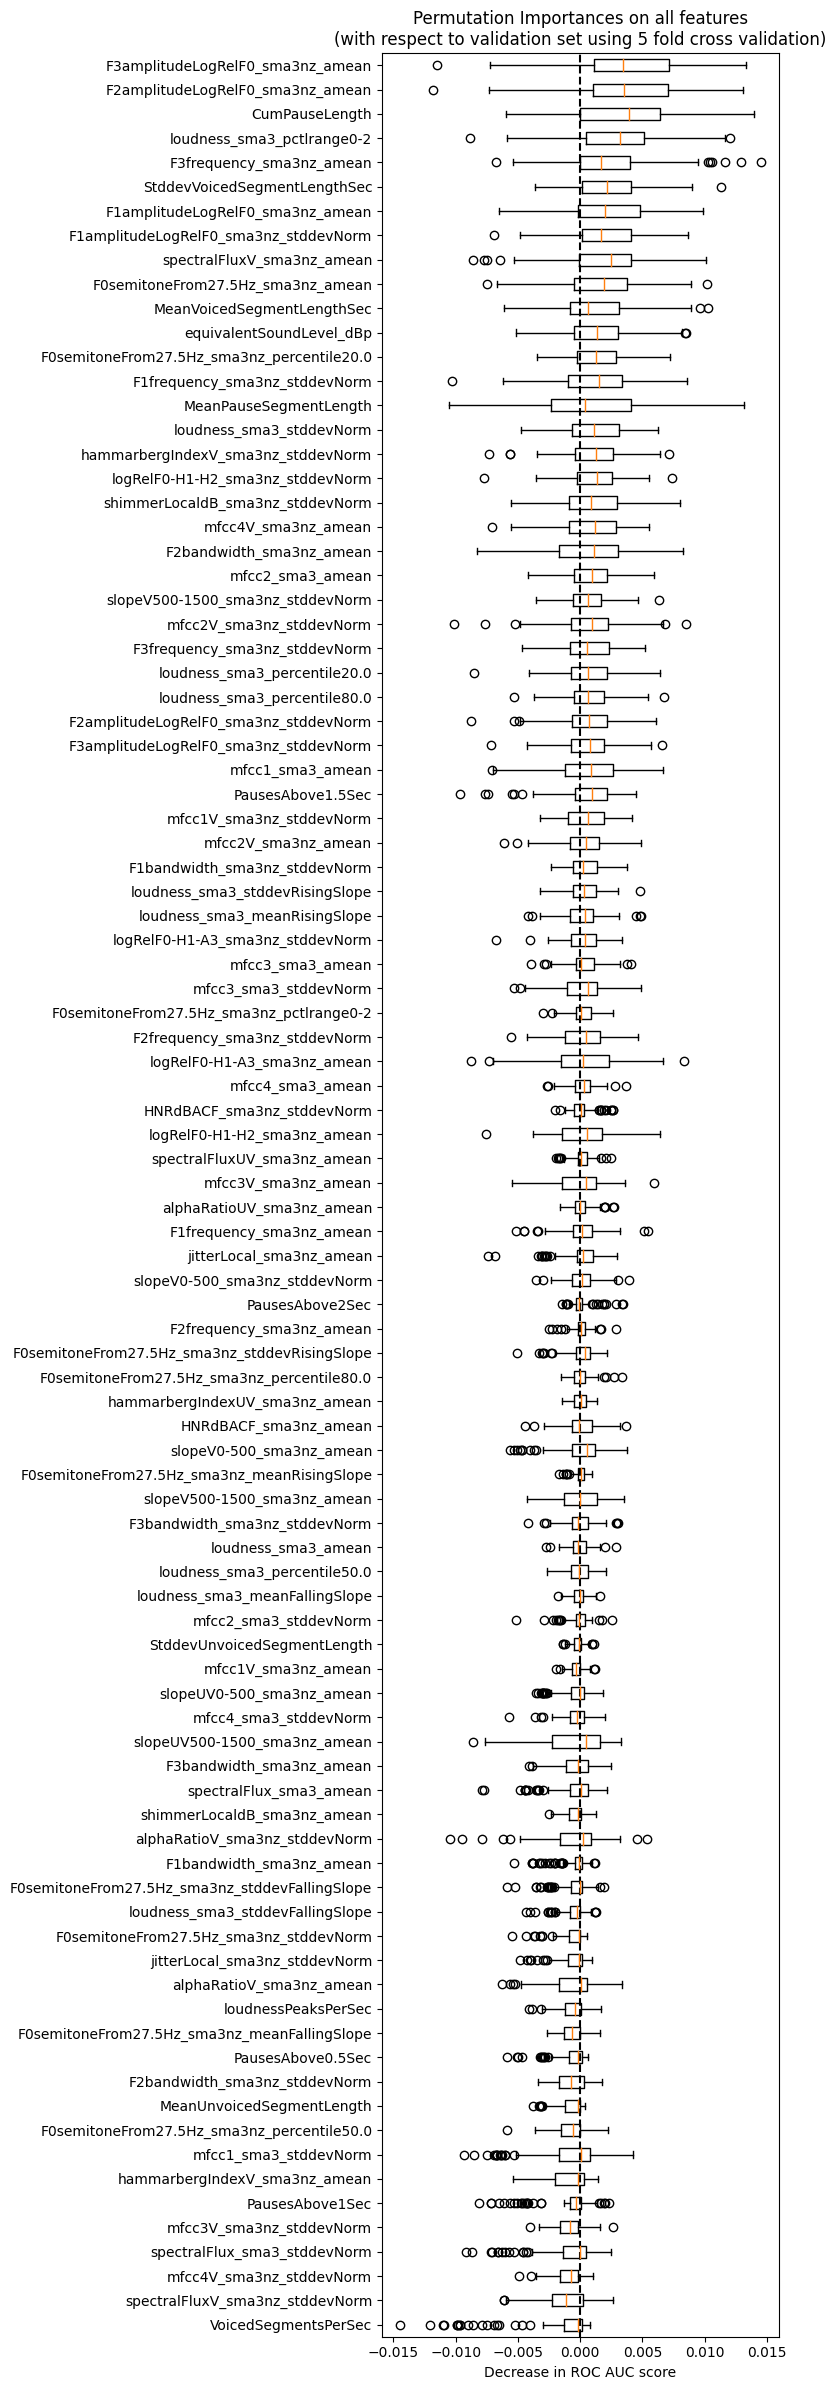

In [15]:
fig, ax = plt.subplots(figsize=(8, 24))

ax.boxplot(
    importances[perm_sorted_idx].T,
    vert=False,
    labels=AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES[perm_sorted_idx],
)
ax.axvline(x=0, color="k", linestyle="--")

ax.set_title(
    "Permutation Importances on all features\n(with respect to validation set using 5 fold cross validation)")
ax.set_xlabel("Decrease in ROC AUC score")
ax.figure.tight_layout()
plt.show() 

In [16]:
AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES = np.asarray(AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES)

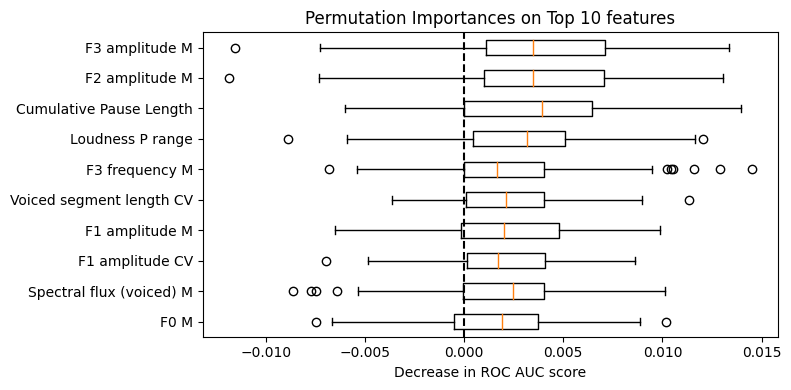

In [17]:
# Number of top features to display
top_n = 10

fig, ax = plt.subplots(figsize=(8, 4))

# Get the top N features and their importances
top_features = AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES[perm_sorted_idx][-top_n:]
top_importances = importances[perm_sorted_idx].T[:, -top_n:]

top_features_pretty = []
for i in top_features:
    top_features_pretty.append(var_name_to_feat[i])

# Create the boxplot for the top features
ax.boxplot(top_importances, vert=False, labels=top_features_pretty)
ax.axvline(x=0, color="k", linestyle="--")

ax.set_title("Permutation Importances on Top 10 features")
ax.set_xlabel("Decrease in ROC AUC score")
ax.figure.tight_layout()
plt.show()

In [18]:
M = np.mean(top_importances, axis=0)

In [19]:
SD = np.std(top_importances, axis=0)

In [20]:
top_features

array(['F0semitoneFrom27.5Hz_sma3nz_amean', 'spectralFluxV_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_stddevNorm',
       'F1amplitudeLogRelF0_sma3nz_amean', 'StddevVoicedSegmentLengthSec',
       'F3frequency_sma3nz_amean', 'loudness_sma3_pctlrange0-2',
       'CumPauseLength', 'F2amplitudeLogRelF0_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_amean'], dtype='<U46')

In [21]:
df = pd.DataFrame({'feature':top_features, 'M':M, 'SD': SD})
df

,feature,M,SD
0,F0semitoneFrom27.5Hz_sma3nz_amean,0.001843,0.003075
1,spectralFluxV_sma3nz_amean,0.001879,0.003420
2,F1amplitudeLogRelF0_sma3nz_stddevNorm,0.001951,0.003173
3,F1amplitudeLogRelF0_sma3nz_amean,0.002224,0.003831
4,StddevVoicedSegmentLengthSec,0.002244,0.002851
5,F3frequency_sma3nz_amean,0.002345,0.003904
6,loudness_sma3_pctlrange0-2,0.003073,0.004163
7,CumPauseLength,0.003481,0.004572
8,F2amplitudeLogRelF0_sma3nz_amean,0.003591,0.004885
9,F3amplitudeLogRelF0_sma3nz_amean,0.003614,0.004864
